# Stroke Prediction Dataset
# Contributed by Bashir Ahmad Gulistani
# Supervised by Dr. Ahmed

In [1004]:
# importing all the necassry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1005]:
# reading our dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [1006]:
# the size of the dataset, 5110 rows and 12 columns 
df.shape

(5110, 12)

In [1007]:
# columns of the dataset
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Checking the categorical && non-categorical values 

In [1008]:
# checking the unique values of Gender
df['gender'].unique() 

array(['Male', 'Female', 'Other'], dtype=object)

In [1009]:
# deleting Other as it is not relevant to Gender
df = df[df['gender'] != 'Other']

df.shape

(5109, 12)

In [1010]:
# checking the unique values of hypertension
df['hypertension'].unique()

array([0, 1])

In [1011]:
# checking the unique values of heart_disease
df['heart_disease'].unique()

array([1, 0])

In [1012]:
# checking the unique values of heart_disease
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [1013]:
# checking the unique values of work_type
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [1014]:
# checking the unique values of Residence_type
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [1015]:
# checking the unique values of smoking_status
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [1016]:
# checking the unique values of stroke
df['stroke'].unique()

array([1, 0])

In [1017]:
# checking the maximum and minimum values of avg_glucose_level
Max = df['avg_glucose_level'].max()
Min = df['avg_glucose_level'].min()
print(Max, Min)

271.74 55.12


In [1018]:
# checking the maximum and minimum values of bmi
Max = df['bmi'].max()
Min = df['bmi'].min()
print(Max, Min)

97.6 10.3


### Dropping any NULL values

In [1019]:
# checking if our dataset has any NULL values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [1020]:
# droping NULL values and save it
df.dropna(inplace=True)

In [1021]:
# checking if NULL values are dropped
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Adding another column to categorize body mass index

In [1022]:
# define an array of bins to store the edges of segmentations
bmi_bins = [10.3, 18.4, 24.9, 29.9, 34.9, 97.6]
# define labels of those segmentations
labels = ['Underweight','Normal','Overweight','Obese', 'Extremely Obese']
# segmenting bmi column into 5 categories based on the bmi_bins array
df['bmiCategory'] = pd.cut(df['bmi'], bins=bmi_bins, labels = labels)
df['bmiCategory'].value_counts()


Overweight         1409
Normal             1242
Obese              1000
Extremely Obese     920
Underweight         336
Name: bmiCategory, dtype: int64

### Adding another column to categorize age

In [1023]:
# checking the maximum and minimum of age
Max = df['age'].max()
Min = df['age'].min()
print(Max, Min)

82.0 0.08


In [1024]:
# define an array of bins to store the edges of segmentations
age_bins = [0, 14, 24, 64, 82]
# define labels of those segmentations
labels = ['Children','Youth','Adults','Seniors']
# segmenting age column into 4 categories based on the age_bins array
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels = labels)
df['Age_Group'].value_counts()

Adults      2746
Seniors      953
Children     682
Youth        527
Name: Age_Group, dtype: int64

### Checking Duplicates

In [1025]:
# checking if there is any duplicates so that we can drop it
df[df.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmiCategory,Age_Group


# Visualization

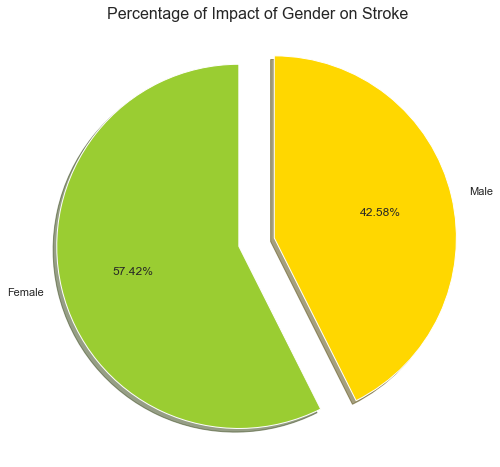

In [1151]:
# setting the figure of plot to 8 by 8 
plt.figure(figsize=(8,8))
# using groupby to count the number of strokes (1s only) and grouping them by gender column
d = df.groupby('gender')['stroke'].sum()
# use two different colors for pie chart
colors = ['yellowgreen','gold'] 
# using pie chart to plot the result we got from groupby function
plt.pie(d.values,labels=d.index, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('Percentage of Impact of Gender on Stroke', fontsize=16)
plt.axis('equal')
plt.show()


Result: As we can see from the bar graph above, Female are more likely to have stroke than male. From the data that we have, 57.42% of people who have stroke are Women while 42.58% of people who have stroke are men. This can also have other variables associated with it that makes Female to have higher change of having stroke but for now, we can say that women have a higher change of getting stroke than men.

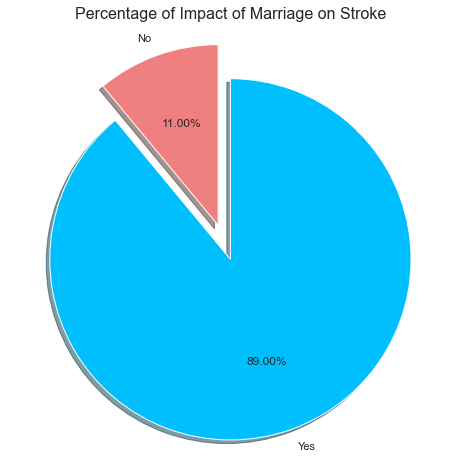

In [1163]:
#2 Does Marriage status cause stroke?

# setting the figure of plot to 8 by 8 
plt.figure(figsize=(8,8))
# using groupby to count the number of strokes (1s only) and grouping them by ever_married columns
d = df.groupby('ever_married')['stroke'].sum()
# using pie chart to plot the result we got from groupby function
colors = ['lightcoral','DeepSkyBlue']
plt.pie(d.values,labels=d.index, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('Percentage of Impact of Marriage on Stroke', fontsize=16)
plt.axis('equal')
plt.show()

Result: As we can see from the graph above, people who are married have more chance of getting a stroke than people who are not married. Based on our dataset, 89% of people who are married have stroke and 11% of people who are not married have stroke. This can also mean that people who are mar- ried are most likely old, and older people have more chance of getting stroke but if we see the big- ger picture in here. People who are not married don't have to stress about their kids, or wife, or pro- viding for the family. This indicates that marriage might have an effect on getting a stroke.

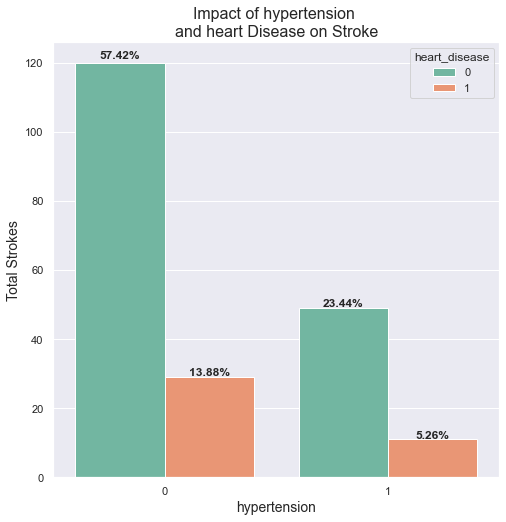

In [1122]:
#3 Does high blood pressure and heart disease cause stroke?
# setting the figure of plot to 8 by 8 
plt.figure(figsize=(8,8))
# using groupby to count the number of strokes (1s only) and grouping them by hypertension,and heart_disease columns
d = df.groupby(['hypertension', 'heart_disease'])[['stroke']].sum()
# reset index of d to make it into three columns instead of 1
d = d.reset_index()

# using groupby and multiplying each value with 100 and dividing them by total number of strokes to find the percentage
per = df.groupby(['hypertension', 'heart_disease'])['stroke'].sum()*100 / df['stroke'].sum()
# reseting the index of percentage to use it as Series
reseted4 = per.reset_index()
# using sns barplot to plot the result we got from groupby function
graph = sns.barplot(x="hypertension", y="stroke", hue="heart_disease", data=d, palette='Set2')
plt.title('Impact of hypertension \nand heart Disease on Stroke', fontsize=16)
plt.xlabel('hypertension', fontsize=14)
plt.ylabel('Total Strokes', fontsize=14)
# storing percentage values to use it in for loop (first two belongs heart_disease 0 and second two belongs to heart_diesease 1  )
pervalues = [reseted4.stroke[0], reseted4.stroke[2],reseted4.stroke[1], reseted4.stroke[3]]
# using for loop to get the width and height of each bar to write percentage on top of them. 
i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(pervalues[i], 2))+'%',
             ha='center',
             weight='bold')
    i += 1



Result: As we can see from the above graph, we can see a surprising factor that both heart disease and hy- pertension does not have that much effect on stroke. 57.42% of people who don't have hypertension and don't have heart disease, also do not have stroke. 13.88% of people who don't have high blood pressure but have heart disease also have stroke. On the other hand, 23.44% of people who have hypertension and don't have heart disease have stroke. And 5.26% of people who both have high blood pressure and heart disease have stroke. Thus, people who have both high blood pressure and heart disease are less chance of getting stroke according to our dataset. Also, those who have heart disease but don't have hypertension have a little more chance of getting stroke. Those who have hy- pertension but don't have heart disease also have a little more chance of getting stroke. So, we can understand that someone who have either hypertension or heart disease or both doesn't have to wor- ry about getting stroke.

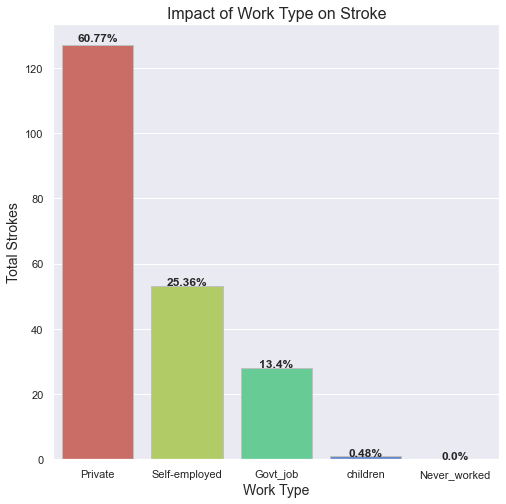

In [1124]:
#4 Does Work-type effect stroke?
# using groupby and multiplying each value with 100 and dividing them by total number of strokes to find the percentage
per = df.groupby('work_type')['stroke'].sum()*100/df['stroke'].sum()
# sorting values based on descending order 
per = per.sort_values(ascending=False)
# setting the figure of plot to 8 by 8 
plt.figure(figsize=(8,8))
# reseting the index of percentage to use it as Series
reseted4 = per.reset_index()

# using groupby to count the number of strokes (1s only) and grouping them by work_type columns and sorting them into descending order
d = df.groupby('work_type')['stroke'].sum().sort_values(ascending=False)
# using sns barplot to plot the result we got from groupby function
graph = sns.barplot(x =d.index,y=d, edgecolor='silver',palette='hls')
plt.title('Impact of Work Type on Stroke', fontsize=16)
plt.xlabel('Work Type', fontsize=14)
plt.ylabel('Total Strokes', fontsize=14)


# using for loop to get the width and height of each bar to write percentage on top of them. 
i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
      
    plt.text(x+width/2,
             y+height*1.01,
             str(round(reseted4.stroke[i],2))+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()


Result: From the above bar chart, we can get that those people who work in private organizations are more likely to get stroke. 60.77% of people are working in private organizations and these people have more chance of getting stroke than other groups. This can be because of high stress associated with working privately but can also dependent on other factors. 25.36% of people work for themselves, which their chance of getting stroke is lower. After that comes government jobs as 13.4% of people got stroke. After that comes children which is very low and people who never work comes last which is 0%. However, this result can be associated with number of people who work in different organizations. For example, there are more people who in private organizations than those who don't have a work. So, we cannot solely say that those who work in private companies have more likely to get stroke.

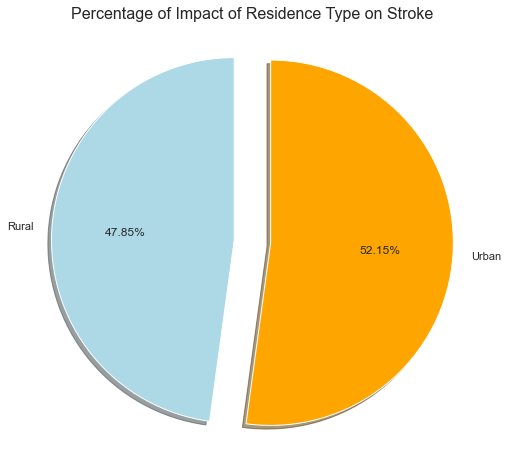

In [1164]:
#5 Does Residence Type effect stroke?
# setting the figure of plot to 8 by 8 
plt.figure(figsize=(8,8))
# using groupby to count the number of strokes (1s only) and grouping them by Residence_type columns 
d = df.groupby('Residence_type')['stroke'].sum()
# using pie graph to plot the result we got from groupby function
colors = ['lightblue','orange'] 
plt.pie(d.values,labels=d.index, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('Percentage of Impact of Residence Type on Stroke', fontsize=16)
plt.axis('equal')
plt.show()


Result: As we can see from the graph, the result is quit similar. But there is little difference, people who live in urban areas are more likely to get a stroke than people who live in rural. But this effect is not that much, so both people who either live in rural or urban have the same chance of getting stroke, and living in different places doesn't have that much effect on stroke. This little difference can be about the responsibilities associated with living on Urban areas and stress evolved around that.

Text(0, 0.5, 'Total Strokes')

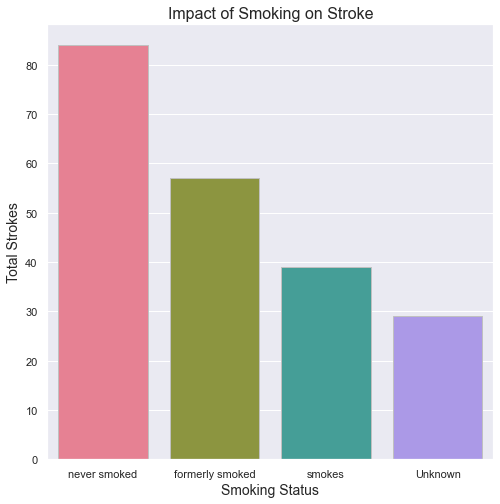

In [1126]:
#6 Does smoking effect stroke?
# setting the figure of plot to 8 by 8 
plt.figure(figsize=(8,8))
# using groupby to count the number of strokes (1s only) and grouping them by smoking_status column and sorting them into descending order
dN = df.groupby('smoking_status')['stroke'].sum().sort_values(ascending=False)
# using sns barplot to plot the result we got from groupby function
sns.barplot(x =dN.index,y = dN, edgecolor='silver', palette='husl')
plt.title('Impact of Smoking on Stroke', fontsize=16)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Total Strokes', fontsize=14)



Result: As we can see the graph above, people who don't smoke have a higher chance of getting stroke than those who don't. Also, those who formerly smoked have more chance of getting stroke than those who are smoking. But still people who smoke have a little more chance of getting stroke too. So, smoke is a factor in getting stroke.

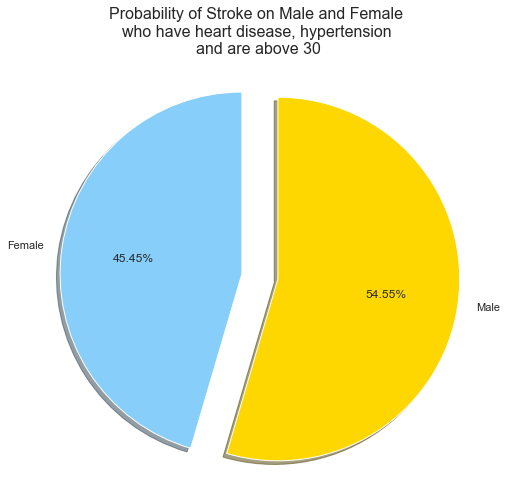

In [1152]:
#7 The number of Male and Females who are above 30 who have heart_disease and hypertension have stroke?
# filtering people who are above 30, have both hypertension and heart_disease
new_df = df[(df['age'] >= 30) & (df['hypertension'] == 1) & (df['heart_disease'] == 1)]

# using groupby to count the number of strokes (1s only) and grouping them by gender column
d = new_df.groupby('gender')['stroke'].sum()

# setting the figure of plot to 8 by 8 
plt.figure(figsize=(8,8))
# using pie chart to plot the result we got from groupby function
colors = ['lightskyblue','gold']
plt.pie(d.values,labels=d.index, colors=colors, startangle=90, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title('Probability of Stroke on Male and Female \nwho have heart disease, hypertension \nand are above 30', fontsize=16)
plt.axis('equal')
plt.show()


Result: As we can see from the graph above, Male who have heart disease, hypertension and are above 30 years old have more chance of getting stroke than female who have heart disease, hypertension and are above 30 years old. The probability of male getting stroke is 54.55% while for female it is 45.45% given if they have heart disease, hypertension and are above 30 years old.

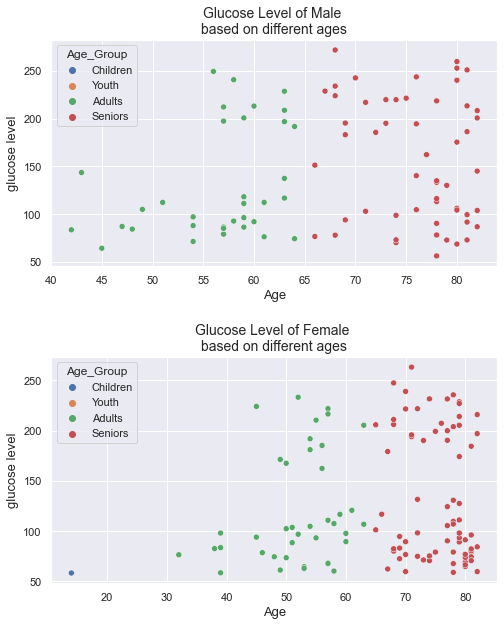

In [1105]:
#8 Average glucose_level of both male and female who have stroke
# filtering people who are Male and have Stroke and storing them into dM var 
dM = df[(df['gender'] == 'Male') & (df['stroke'] == 1)]
# filtering people who are Female and have Stroke and storing them into dM var 
dF = df[(df['gender'] == 'Female') & (df['stroke'] == 1)]
# setting the figure of plot to 8 by 8 
plt.figure(figsize = (8,10))
# using subplot to plot two plots at the same time, 2 means that there are 2 rows, 1 column, and in the first location
plt.subplot(2,1,1)
# using sns scatterplot with Male data to plot age and avg_glucose_level based on Age Group
sns.scatterplot(x='age', y='avg_glucose_level', data=dM,hue='Age_Group') 
plt.title("Glucose Level of Male \nbased on different ages", fontsize=14);
plt.xlabel('Age',fontsize=13)
plt.ylabel('glucose level',fontsize=13)
# ploting at second row,initalizing one column and in the second location
plt.subplot(2,1,2)
# using sns scatterplot with Female data to plot age and avg_glucose_level based on Age Group
sns.scatterplot(x='age', y='avg_glucose_level', data=dF,hue='Age_Group')
plt.title("Glucose Level of Female \nbased on different ages", fontsize=14);
plt.xlabel('Age',fontsize=13)
plt.ylabel('glucose level',fontsize=13)
# giving space between plots
plt.subplots_adjust(hspace=0.4)



Result: As we can see from both graphs, the glucose level and age of both male and female don't have a direct relationship, meaning the more age a person has, it is not equivalent to the more glucose lev- el. It is also not an indirect relationship, it is kind of mix of both. If we see the first graph, men who have higher glucose level also have higher age. Another thing that we can notice from the graph is that people who have a higher glucose level are both adults and seniors, there are no child or youth who have higher glucose level. So, we can notice that people who have stroke are mostly adults and seniors. We can only see one female child having stroke and from youth group, there are none. Also, we can notice that the age range of men who have stroke are between 40 to 80 with 80 having the most values, on the other hand, the age range of women who have stroke are between 10 to 80 with 80 having the most values. So, women are getting stroke at early ages two while men are get- ting stroke much older than women. At the end, we can also see that the glucose level of men are higher than women.

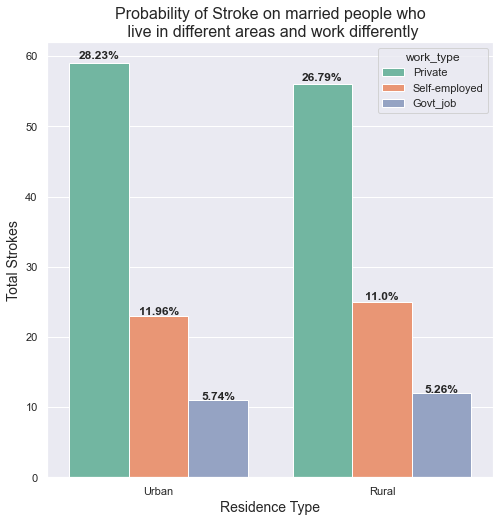

In [1129]:
#9 the number of people who die because of stroke who are married, work in different sectors, and live in either rural
# Urban areas
# filtering values
dfMarried = df[df['ever_married'] == 'Yes']
# using groupby to count the number of strokes (1s only) and grouping them by Residence_type,and work_type columns and sorting them into descending order
d = dfMarried.groupby(['Residence_type', 'work_type'])['stroke'].sum().sort_values(ascending=False)
# using groupby and multipliyng each value with 100 and dividing them by total number of strokes to find the percentage
per = dfMarried.groupby(['Residence_type', 'work_type'])['stroke'].sum()*100 / df['stroke'].sum()
# sorting values into descending order and reseting index
reseted4 = per.sort_values(ascending=False).reset_index()

# set plot figure to 8 by 8
plt.figure(figsize=(8,8))
# reset index of d to use it as Series
d = d.reset_index()
# using sns barplot to plot the result we got from groupby function
graph = sns.barplot(x="Residence_type", y="stroke", hue="work_type", data=d,palette='Set2')
plt.title('Probability of Stroke on married people who\n live in different areas and work differently', fontsize=16)
plt.xlabel('Residence Type', fontsize=14)
plt.ylabel('Total Strokes', fontsize=14)
# using for loop to get the width and height of each bar to write percentage on top of them. 
i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(round(reseted4.stroke[i], 2))+'%',
             ha='center',
             weight='bold')
    i += 1


Result: As we can see from the graph, living in different places does not increase the chance of getting a stroke for married people. Married people who work in private organization does seem to have more likely to get stroke in both Urban and Rural. After that comes self-employed which is also quite similar in both urban and rural and people who work in government jobs and live in either ur- ban or rural areas have the same chance of getting stroke. In other words, people who live in urban area and work in different organization seems to have the same chance of getting a stroke as people who live in rural areas and work in the same organization.

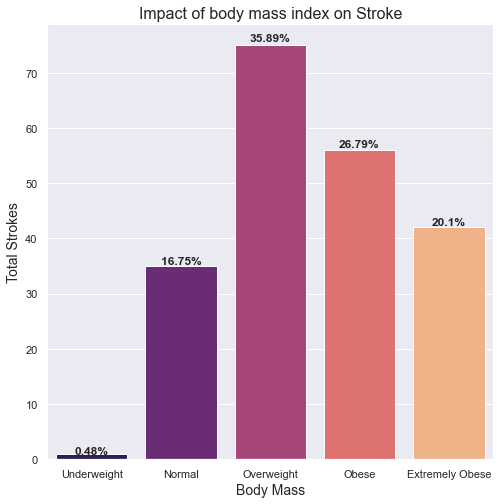

In [1130]:
# 10 BMI
# using groupby to count the number of strokes (1s only) and grouping them by bmiCategory column and sorting them into descending order
d = df.groupby('bmiCategory')[('stroke')].sum().sort_values(ascending=False)
# using groupby and multipliyng each value with 100 and dividing them by total number of strokes to find the percentage
per = df.groupby('bmiCategory')['stroke'].sum()*100/df['stroke'].sum()
# set plot figure to 8 by 8
plt.figure(figsize=(8,8))
# reseting the index of percentage to use it as Series
reseted4 = per.reset_index()

# using sns barplot to plot the result we got from groupby function
graph = sns.barplot(x=d.index, y=d, palette='magma')
plt.title('Impact of body mass index on Stroke', fontsize=16)
plt.xlabel('Body Mass', fontsize=14)
plt.ylabel('Total Strokes', fontsize=14)

# using for loop to get the width and height of each bar to write percentage on top of them. 
i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
      
    plt.text(x+width/2,
             y+height*1.01,
             str(round(reseted4.stroke[i],2))+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()


Result: As we can see from the graph above, overweight people are more likely to get a stroke than other groups, having 35.89%. After that we have the normal people with 16.75%, obese with 26.79%, ex- tremely obese with 20.1%. So, underweight people are less likely to get stroke than other groups with 0.48%.

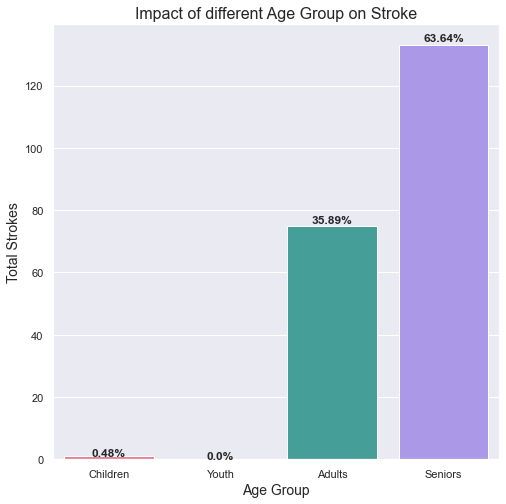

In [1132]:
# 11 Age Categorizes based on Stroke
# using groupby to count the number of strokes (1s only) and grouping them by Age_Group column 
d = df.groupby('Age_Group')['stroke'].sum()
# using groupby and multipliyng each value with 100 and dividing them by total number of strokes to find the percentage
per = df.groupby('Age_Group')['stroke'].sum()*100/df['stroke'].sum()
# set plot figure to 8 by 8
plt.figure(figsize=(8,8))
# reseting the index of percentage to use it as Series
reseted4 = per.reset_index()
# using sns barplot to plot the result we got from groupby function
graph = sns.barplot(x=d.index, y=d, palette='husl')
plt.title('Impact of different Age Group on Stroke', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Total Strokes', fontsize=14)
# using for loop to get the width and height of each bar to write percentage on top of them. 
i = 0
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
      
    plt.text(x+width/2,
             y+height*1.01,
             str(round(reseted4.stroke[i],2))+'%',
             ha='center',
             weight='bold')
    i += 1
plt.show()


Result: As we can see from the above graph, seniors are more likely to get a stroke than any other age group with 63.64%. After that we have adults who are more likely to get stroke with 35.89%, and then children with 0.48% and youth categories which is 0%. Thus, Most strokes are happening in seniors and adults than any other people.


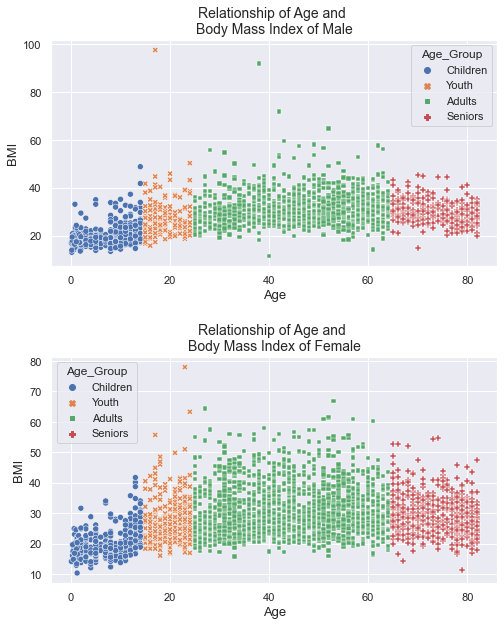

In [1077]:
# 12 Age and BMI on Stroke
#filtering gender
dNew = df[df['gender'] == "Male"]
dN = df[df['gender'] == "Female"]

# set plot figure to 8 by 10
plt.figure(figsize = (8,10))
# set two plots, initalizing one column and ploting it in the first location
plt.subplot(2,1,1)
# using sns scatterplot with Male data to plot age and bmi based on Age Group
sns.scatterplot(x='age', y='bmi', data=dNew,hue='Age_Group',style='Age_Group') 
plt.title("Relationship of Age and \nBody Mass Index of Male", fontsize=14);
plt.xlabel('Age', fontsize=13)
plt.ylabel('BMI', fontsize=13)
# set two plots, initalizing one column and ploting it in the second location
plt.subplot(2,1,2)
# using sns scatterplot with Female data to plot age and bmi based on Age Group
sns.scatterplot(x='age', y='bmi', data=dN,hue='Age_Group',style='Age_Group')
plt.title("Relationship of Age and \nBody Mass Index of Female",fontsize=14);
plt.xlabel('Age', fontsize=13)
plt.ylabel('BMI', fontsize=13)
# giving space between plots
plt.subplots_adjust(hspace=0.4)

Result: As we can see from the above graph, the relationship between age and bmi of male and female look more like a direct relationship. As the age goes up, the bmi goes up too in both graphs. Also, we have more overweight people who are women than we do for men. On the other hand, the highest bmi value belongs to men which is about 100. So, the range of bmi with most values of men are be- tween 20-40 while the range of women are between 20-50. Thus, More women are in different ages have higher bmi than men.

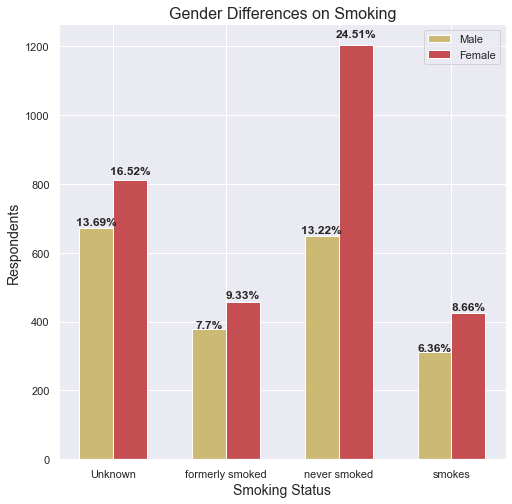

In [1078]:
# 13 Smoking Status based on Gender
# using groupby to count number of male and female and grouping them by smoking_status column 
d = df.groupby('smoking_status')['gender'].value_counts()
# using groupby and multipliyng each value with 100 and dividing them by total number of strokes to find the percentage
per = df.groupby('smoking_status')['gender'].value_counts()*100 / len(df['smoking_status'])
# storing values that are associated with Female to female var and Male to male var
female = [d.values[0], d.values[2], d.values[4], d.values[6]]
male = [d.values[1], d.values[3], d.values[5],d.values[7]]

# set plot figure to 8 by 8
plt.figure(figsize=(8,8))

x = np.arange(len(female))
w = 0.3
# ploting four bars that belongs to Male 
graph = plt.bar(x, male, width = w, color='y', label = 'Male')
# ploting four bars that belongs to Female
graph2 = plt.bar(x+w, female, width=w, color='r', label = 'Female')

# changing the labels of each graph
plt.xticks(x+w/2,['Unknown','formerly smoked','never smoked', 'smokes'])
plt.title('Gender Differences on Smoking', fontsize=16)
plt.xlabel('Smoking Status', fontsize=14)
plt.ylabel('Respondents', fontsize=14)
# adding legend in the upper right of our graph
plt.legend(loc='upper right')

# adding percentage to Male bar graphs
i = 1
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
      
    plt.text(x+width/2,
             y+height*1.01,
             str(round(per.values[i],2))+'%',
             ha='center',
             weight='bold')
    i += 2

# adding percentage to Female bar graphs
i = 0
for p in graph2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
      
    plt.text(x+width/2,
             y+height*1.02,
             str(round(per.values[i],2))+'%',
             ha='center',
             weight='bold')
    i += 2
plt.show()

Result: Based on the bar chart, 16.52% of Female did not tell if they were smoking or not, on the other hand, 13.69% of Male did not provide the information. Coming to the second group, 9.33% of Fe- male and 7.7% of Male were formerly smoking. In the third group, 24.51% of Females and 13.22% of Males never smoked. In the fourth group, 8.66% of Females and 6.36% of Males are smoking. From this chart, we can get the result that more women leads all the categories of formerly smoked, never smoked and smokes. We cannot really say that more women smokes than men because more women also never smokes than men.

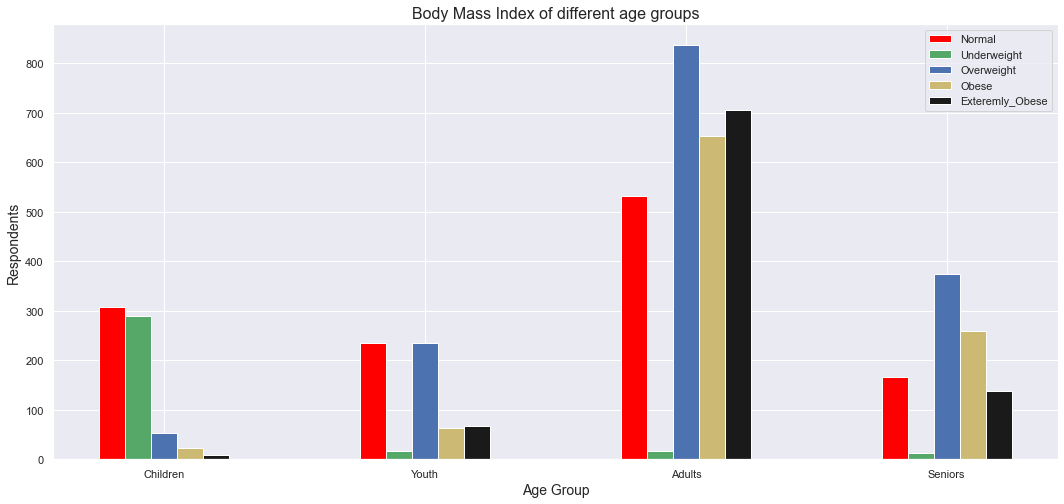

In [1075]:
# 14
# using groupby to count number of bmi Category and grouping them by Age_Group column 
d = df.groupby('Age_Group')['bmiCategory'].value_counts()
# Storing values that belongs to Normal Category
Normal = [d.values[0], d.values[5], d.values[13], d.values[17]]
# Storing values that belongs to Underweight Category
Underweight = [d.values[1], d.values[9], d.values[14],d.values[19]]
# Storing values that belongs to Overweight Category
Overweight = [d.values[2], d.values[5], d.values[10],d.values[15]]
# Storing values that belongs to Obese Category
Obese = [d.values[3], d.values[8], d.values[12],d.values[16]]
# Storing values that belongs to Exteremly_Obese Category
Exteremly_Obese = [d.values[4], d.values[7], d.values[11],d.values[18]]
# set plot figure to 18 by 8
plt.figure(figsize=(18,8))
x = np.arange(len(Normal))
w = 0.1
# plotting the Normal category bar by using the Normal variable
plt.bar(x, Normal, width = w, color='r', label = 'Normal')
# plotting the Underweight category bar by using the Underweight variable
plt.bar(x+w, Underweight, width=w, color='g', label = 'Underweight')
# plotting the Overweight category bar by using the Overweight variable
plt.bar(x+w*2, Overweight, width=w, color='b', label = 'Overweight')
# plotting the Obese category bar by using the Obese variable
plt.bar(x+w*3, Obese, width=w, color='y', label = 'Obese')
# plotting the Exteremly_Obese category bar by using the Exteremly_Obese variable
plt.bar(x+w*4, Exteremly_Obese, width=w, color='k', label = 'Exteremly_Obese')
# using xticks to change the x labels to Age_Group Category
plt.xticks(x+w*4/2,['Children','Youth','Adults', 'Seniors'])
plt.title('Body Mass Index of different age groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Respondents', fontsize=14)
plt.legend(loc='upper right')


Result: Based on the graph, in the children group, there are more Normal weighted people, followed by un- derweight category. So, most children are either normal or underweight. A very low percentage of them can be overweight, obese, or extremely obese. In the Youth group, there are more Normal weighted people and overweighted people than other bmi groups. So, most youths are either Nor- mal weighted or overweighted. There are few youths who are underweight, obese, or extremely obese. In the adults category, there are more overweight, followed by extremely obese, followed by obese, and followed by normal people. But there are so few people who are underweight which is interesting. In the seniors category, there are more overweight people, followed by obese, followed by normal, and followed by extremely obese. But there are so few people who are underweight. So, only in children category a huge portion of them are underweight while in youth, adults, and seniors category, there are so few underweight people. Thus, most skinny people are children, and most overweighted and extremely obese people are adults.


# Conclusion

A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off. Strokes are a medical emergency and urgent treatment is essential. So, I used this dataset to predict stroke based on different attributes. I found that Gender, Marriage, work type, smoking, body mass index, and age play an important role on getting a stroke. In other words, women and men who are married, work in private sectors, smokes, overweighted, and old are more likely to get stroke.